#### Architektura prostej sieci neuronowej, do rozwiązywania zadania alternatywy wykluczającej

warstwa wejściowa: 2 neurony

warstwa ukryta: 2 neurony

warstwa wyjściowa: 1 neuron

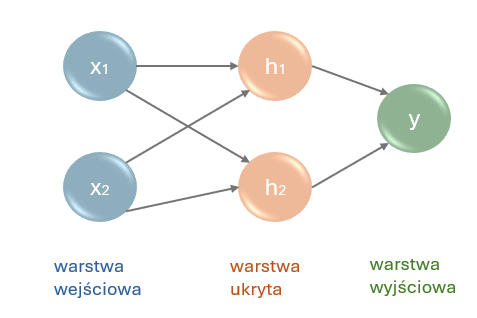

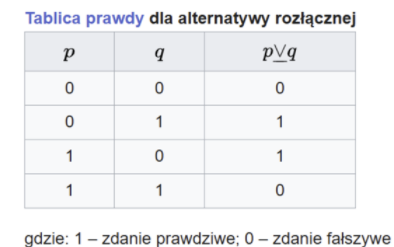

In [2]:
import numpy as np
# Dane treningowe 
#              p  q
X = np.array([[0, 0],
              [0, 1], 
              [1, 0], 
              [1, 1]])  
y = np.array([[0], [1], [1], [0]])  # Oczekiwane wyniki (p albo q)

In [3]:
# Inicjalizacja wag (losowe wartości w przedziale -1 do 1)
np.random.seed(1)
w_hidden = np.random.uniform(-1, 1, (2, 2))  # Wagi dla warstwy ukrytej (2x2)
b_hidden = np.random.uniform(-1, 1, (1, 2))  # Bias warstwy ukrytej (1x2)
w_output = np.random.uniform(-1, 1, (2, 1))  # Wagi dla warstwy wyjściowej (2x1)
b_output = np.random.uniform(-1, 1, (1, 1))  # Bias warstwy wyjściowej (1x1)
print(f'wagi warstwy ukrytej: {w_hidden[0]}')
print(f'                      {w_hidden[1]}')
print(f'bias warstwy ukrytej: {b_hidden[0]}')
print(f'wagi warstwy wyjściowej: {w_output[0]}, {w_output[1]}')
print(f'bias warstwy wyjściowej: {b_output[0]}')

wagi warstwy ukrytej: [-0.16595599  0.44064899]
                      [-0.99977125 -0.39533485]
bias warstwy ukrytej: [-0.70648822 -0.81532281]
wagi warstwy wyjściowej: [-0.62747958], [-0.30887855]
bias warstwy wyjściowej: [-0.20646505]


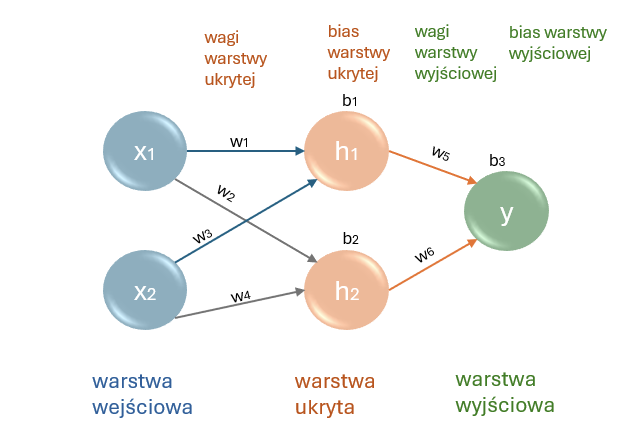

#### Przepływ danych przez sieć:
 1. Dane wejściowe np: x1 = 0, x2 = 1
 2. Obliczanie sumy ważonej dla każdego neuronu ukrytego:
      
$$
h_1  =  (x_1 * w_1) + (x_2 * w_3) + b_1    
$$
      
$$
h_2  =  (x_1 * w_2) + (x_2 * w_4) + b_2    
$$ 

$$
h_1  =  (0 * -0.17) + (1 * -0.99) + (-0.7) = - 1.69
$$
      
$$
h_2  =  (0 * 0.44) + (1 * -0.36) + (-0.81)  = -1.17
$$ 

2.1. Zastosowanie funkcji aktywacji (sigmoid) na neuronach z warstwy ukrytej

$$
\sigma (h) = \frac{1}{1 + e^{-h}}
$$

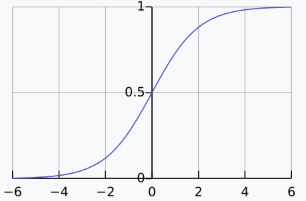

$$
\sigma (h_1) = 0.1557
$$

$$
\sigma (h_2) = 0.236
$$


3. Obliczanie sumy wazonej dla warstwy wyjsciowej 
$$
y_{output}  = \sigma (h_1)  * w_5 +  \sigma (h_2) * w_6 + b_3
$$ 

$$
y_{output}  = (0.1557 * (-0.6 )) + (0.236 * (-0.3)) + (-0.2) = -0.36
$$ 


4. Obliczanie bledu 
error = y - y' = 1 - (-0.36) = 1.36

5. Propagacja wsteczna:
 obliczanie pochodnej błędu
 aktualizacja wag i biasów

In [4]:
# Funkcja aktywacji - Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
 
# Pochodna sigmoidy (do propagacji wstecznej)
def sigmoid_derivative(x):
    sig = sigmoid(x)
    return sig * (1 -sig)
 
# Parametry
learning_rate = 0.5
epochs = 10000
 
# Trening sieci neuronowej
for epoch in range(epochs):
    # === Forward Pass ===
    hidden_input = np.dot(X, w_hidden) + b_hidden  # Suma ważona wejść
    hidden_output = sigmoid(hidden_input)          # Aktywacja sigmoidalna
    
    final_input = np.dot(hidden_output, w_output) + b_output
    final_output = sigmoid(final_input)
    
    # === Obliczenie błędu ===
    error = y - final_output
    
    # === Backpropagation (Propagacja wsteczna) ===
    d_output = error * sigmoid_derivative(final_input)  # Gradient warstwy wyjściowej
    d_hidden = d_output.dot(w_output.T) * sigmoid_derivative(hidden_input)  # Gradient warstwy ukrytej
    
    # === Aktualizacja wag ===
    w_output += hidden_output.T.dot(d_output) * learning_rate
    b_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    w_hidden += X.T.dot(d_hidden) * learning_rate
    b_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate
 
    # Opcjonalnie: wyświetlanie błędu co 1000 epok
    if epoch % 300 == 0:
        loss = np.mean(np.abs(error))
        print(f"Epoka {epoch} - Błąd: {loss:.4f}")
 
# Testowanie sieci
print("\n=== Wyniki po treningu ===")
for i in range(len(X)):
    hidden_output = sigmoid(np.dot(X[i], w_hidden) + b_hidden)
    final_output = sigmoid(np.dot(hidden_output, w_output) + b_output)
    print(f"Wejście: {X[i]} => Przewidywane wyjście: {final_output[0][0]:.4f}")

Epoka 0 - Błąd: 0.4997
Epoka 300 - Błąd: 0.4774
Epoka 600 - Błąd: 0.3872
Epoka 900 - Błąd: 0.3388
Epoka 1200 - Błąd: 0.1574
Epoka 1500 - Błąd: 0.0920
Epoka 1800 - Błąd: 0.0689
Epoka 2100 - Błąd: 0.0569
Epoka 2400 - Błąd: 0.0493
Epoka 2700 - Błąd: 0.0440
Epoka 3000 - Błąd: 0.0401
Epoka 3300 - Błąd: 0.0370
Epoka 3600 - Błąd: 0.0345
Epoka 3900 - Błąd: 0.0324
Epoka 4200 - Błąd: 0.0307
Epoka 4500 - Błąd: 0.0292
Epoka 4800 - Błąd: 0.0279
Epoka 5100 - Błąd: 0.0267
Epoka 5400 - Błąd: 0.0257
Epoka 5700 - Błąd: 0.0248
Epoka 6000 - Błąd: 0.0239
Epoka 6300 - Błąd: 0.0232
Epoka 6600 - Błąd: 0.0225
Epoka 6900 - Błąd: 0.0219
Epoka 7200 - Błąd: 0.0213
Epoka 7500 - Błąd: 0.0207
Epoka 7800 - Błąd: 0.0202
Epoka 8100 - Błąd: 0.0198
Epoka 8400 - Błąd: 0.0193
Epoka 8700 - Błąd: 0.0189
Epoka 9000 - Błąd: 0.0185
Epoka 9300 - Błąd: 0.0182
Epoka 9600 - Błąd: 0.0178
Epoka 9900 - Błąd: 0.0175

=== Wyniki po treningu ===
Wejście: [0 0] => Przewidywane wyjście: 0.0157
Wejście: [0 1] => Przewidywane wyjście: 0.9834
